In [5]:
# Conventionally people rename the pandas import to pd for brevity
import pandas as pd

In [6]:
# Load in the data and preview it
sales = pd.read_csv('home_data.csv') 
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---
### Exploring the data.


In [10]:
### edTest(test_num_rows) ###

# TODO

num_rows = len(sales)

In [11]:
### edTest(test_get_labels) ###

# TODO 

y = sales['price']

In [12]:
### edTest(test_num_inputs) ###

# TODO

num_inputs = len(sales.columns) - 1


---
### Compute the average price of houses in the dataset with 3 bedrooms. Save the result in `avg_price_3_bed`.

In [13]:
### edTest(test_avg_price_3_bed) ###

# TODO 

def avg_price(sales, bedNumber):
    total = 0
    count = 0

    for  index, row in sales.iterrows():
        if row['bedrooms'] == bedNumber:
            total = total + row['price']
            count = count + 1

    if count == 0:
        return None
    else:
        return total / count

avg_price_3_bed = avg_price(sales, 3)


---
### Compute the fraction of properties with `sqft_living` between 2000 (inclusive) and 4000 (exclusive). Your answer should be stored in `percent_q3` and it should be a number between 0 and 1.
 

In [277]:
### edTest(test_percent_q3) ###

# TODO 

def fraction_sqft_living(sales, minimum, maximum):
    count = 0

    for  index, row in sales.iterrows():
        if row['sqft_living'] >=minimum and row['sqft_living'] < maximum:
            count = count + 1

    if count == 0:
        return None
    else:
        return count / len(sales) 

percent_q3 = fraction_sqft_living(sales, 2000, 4000)


---
### Training Linear Regression Models



In [14]:
### edTest(test_setup_train_test_split) ###


In [15]:
from sklearn.model_selection import train_test_split

# Split data into 80% train and 20% test
train_data, test_data = train_test_split(sales, test_size=0.2)

Lets plot some of the data to get a sense of what we are dealing with. You do not need to understand every part of the plotting code here, but plotting is a good skill in Python so it will help to read over this.

Text(0, 0.5, 'Price')

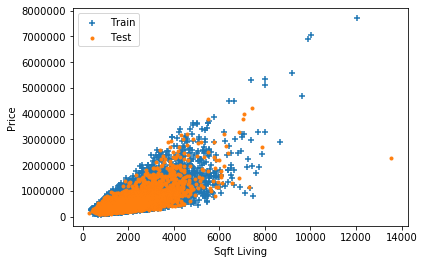

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot sqft_living vs housing price for the train and test da
plt.scatter(train_data['sqft_living'], train_data['price'], marker='+', label='Train')
plt.scatter(test_data['sqft_living'], test_data['price'], marker='.', label='Test')

# Code to customize the axis labels
plt.legend()
plt.xlabel('Sqft Living')
plt.ylabel('Price')

For this problem, we will look at using two sets of features derived from the data inputs. The basic set of features only contains a few data inputs while the advanced features contain them and more.

In [17]:
basic_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [18]:
advanced_features = basic_features + [
    'condition',      # condition of the house
    'grade',          # measure of qality of construction
    'waterfront',     # waterfront property 
    'view',           # type of view
    'sqft_above',     # square feet above ground
    'sqft_basement',  # square feet in basementab
    'yr_built',       # the year built
    'yr_renovated',   # the year renovated
    'lat',            # the longitude of the parcel
    'long',           # the latitide of the parcel
    'sqft_living15',  # average sq.ft. of 15 nearest neighbors 
    'sqft_lot15',     # average lot size of 15 nearest neighbors 
]

---
train two linear regression models
* The first should be saved in a variable called `basic_model` that only uses the basic features
* The seconod should be saved in a variable called `advanced_model` that uses the advanced features



In [20]:
### edTest(test_train_models) ###

from sklearn.linear_model import LinearRegression

x_train_basic = train_data[basic_features]
x_train_advanced = train_data[advanced_features]
y_train = train_data['price']

regressor_basic = LinearRegression()
regressor_advance = LinearRegression()
basic_model=regressor_basic.fit(x_train_basic, y_train)
advanced_model=regressor_advance.fit(x_train_advanced, y_train)


Now, we will evaluate the models' predictions to see how they perform.


In [21]:
### edTest(test_train_rmse) ###

from sklearn import metrics
import numpy as np

y_train_basic_pred = basic_model.predict(x_train_basic)
y_train_advnaced_pred = advanced_model.predict(x_train_advanced)
train_rmse_basic=np.sqrt(metrics.mean_squared_error(y_train, y_train_basic_pred))
train_rmse_advanced=np.sqrt(metrics.mean_squared_error(y_train, y_train_advnaced_pred))

print("RMSE using basic model:", train_rmse_basic)
print("RMSE using advanced model:", train_rmse_advanced)


RMSE using basic model: 254623.62581765626
RMSE using advanced model: 201503.53469129917


---
but compute the test RMSE. Store your results in `test_rmse_basic` and `test_rmse_advanced`.

In [22]:
### edTest(test_test_rmse) ###

x_test_basic = test_data[basic_features]
x_test_advanced = test_data[advanced_features]
y_test = test_data['price']

y_test_basic_pred = basic_model.predict(x_test_basic)
y_test_advnaced_pred = advanced_model.predict(x_test_advanced)
test_rmse_basic=np.sqrt(metrics.mean_squared_error(y_test, y_test_basic_pred))
test_rmse_advanced=np.sqrt(metrics.mean_squared_error(y_test, y_test_advnaced_pred))




> Copyright ©2020 Emily Fox and Hunter Schafer.  All rights reserved.  Permission is hereby granted to students registered for University of Washington CSE/STAT 416 for use solely during Spring Quarter 2021 for purposes of the course.  No other use, copying, distribution, or modification is permitted without prior written consent. Copyrights for third-party components of this work must be honored.  Instructors interested in reusing these course materials should contact the author.